In [29]:
pip list

Package             Version
------------------- ---------
amqp                5.0.6
appnope             0.1.2
argon2-cffi         20.1.0
asgiref             3.2.10
async-generator     1.10
attrs               21.2.0
backcall            0.2.0
bcrypt              3.2.0
billiard            3.6.4.0
bleach              3.3.0
blinker             1.4
celery              5.0.5
certifi             2020.6.20
cffi                1.14.3
chardet             3.0.4
click               7.1.2
click-didyoumean    0.0.3
click-plugins       1.1.1
click-repl          0.1.6
cycler              0.10.0
decorator           5.0.7
defusedxml          0.7.1
Django              3.1.2
dnspython           2.0.0
email-validator     1.1.1
entrypoints         0.3
Flask               1.1.2
Flask-Bcrypt        0.7.1
Flask-Email         1.4.4
Flask-Login         0.5.0
Flask-Mail          0.9.1
Flask-SQLAlchemy    2.4.4
Flask-WTF           0.14.3
gensim              4.0.1
idna                2.10
image               1.5.33

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

from nlp4all.models import *

In [47]:
model_id = 1
db_model = D2VModel.query.filter_by(id=model_id).first()
model = db_model.load()
db_model.name

'Full model'

In [73]:
tweet_cats = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
tweets = Tweet.query.filter(Tweet.category.in_(tweet_cats)).all()

train_corpus = []
for tweet in tweets:
    train_corpus.append((tweet.text, [tweet.id]))
print(len(train_corpus))

40940


In [74]:
tweets_ids = [tweet.id for tweet in tweets]
X = [model.dv[i] for i in tweets_ids]
labels = [tweet.category for tweet in tweets]
print(len(X))
print(len(labels))

40940
40940


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, train_size=0.5)

(array([1563.,    0., 1605.,    0., 1553.,    0., 1606.,    0., 1149.,
           0.,   23.,    0., 1623.,    0., 1596.,    0., 1658.,    0.,
        1623.,    0., 1615.,    0., 1595.,    0., 1627., 1634.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
        12. , 12.5, 13. , 13.5, 14. ]),
 <BarContainer object of 26 artists>)

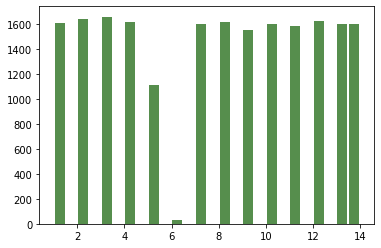

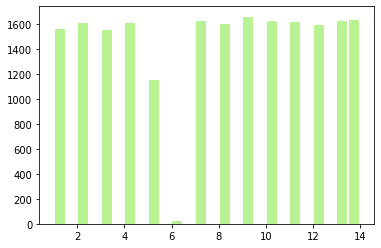

In [76]:
# see if the data is well distributed between training and testing sets
plt.figure(1)
plt.hist(x=y_train, bins='auto', color='#0f5e01', alpha=0.7, rwidth=0.85)
plt.figure(2)
plt.hist(x=y_test, bins='auto', color='#9ced66', alpha=0.7, rwidth=0.85)

In [77]:
# create and train an ANN (keras is not working because of tf pip compatibility)
ANN = MLPClassifier(hidden_layer_sizes=[10,10], max_iter=1000, activation='logistic')
ANN.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[10, 10], max_iter=1000)

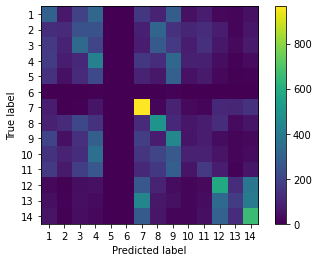

In [78]:
plot_confusion_matrix(ANN, X_train, y_train, include_values=False)

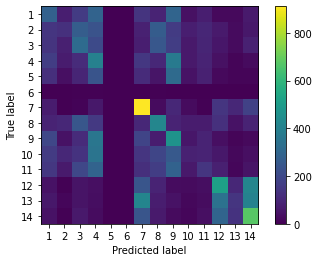

In [79]:
plot_confusion_matrix(ANN, X_test, y_test, include_values=False)

In [69]:
TweetTagCategory.query.filter_by(id=7).first().name

'AndrewYang.json'